Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


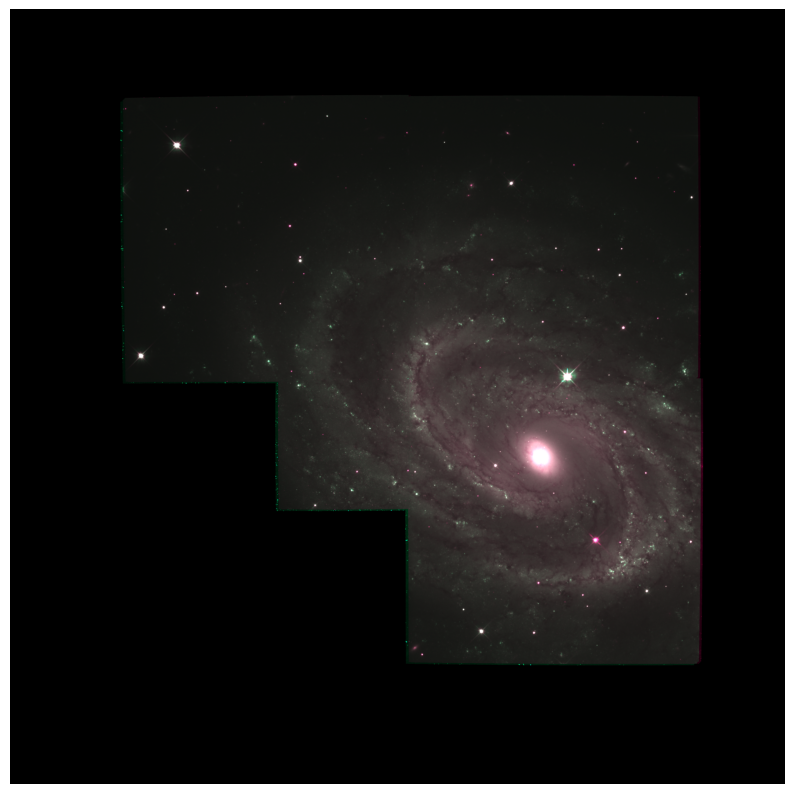

In [46]:
# NGC 4603 (spiral galaxy located in the constellation Centaurus) - Color Composite Image
# Data Source: https://archive.stsci.edu/prepds/sgal/datalist.html

# You can change the values of 'stretch' and 'Q' to adjust the image appearance.
# These values were chosen after multiple trials to give a good contrast.

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Load V-band (visible) and I-band (infrared) FITS data
data_v = fits.getdata("h_n4603_f555_mosaic.fits")   # V-band (greenish)
data_i = fits.getdata("h_n4603_f814_mosaic (2).fits")  # I-band (reddish)

# Function to normalize the image data
def normalize(img, stretch=0.02, Q=0.00001):
    img = img - np.nanmin(img)
    img = img / np.nanmax(img)
    img = np.arcsinh(Q * img / stretch) / np.arcsinh(Q)
    return img

# Apply normalization on both datasets
green_channel = normalize(data_v, stretch=0.02)
red_channel = normalize(data_i, stretch=0.02)

# Create a synthetic blue channel
# Since we don't have blue data, we generate it from the red and green channels
blue_channel = (green_channel + red_channel) / 2.2

# Combine channels to create an RGB image
rgb_image = np.dstack((red_channel, green_channel, blue_channel))

# Display the RGB image
plt.figure(figsize=(10, 20))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')  # Removes axes/borders

# Save the image
plt.savefig("my_image.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [56]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

# Load the FITS files
data_v = fits.getdata("h_n4603_f555_mosaic.fits")   # V-band
data_i = fits.getdata("h_n4603_f814_mosaic (2).fits")  # I-band

# Normalization function
def normalize(img, stretch=0.01, Q=10):
    img = img - np.nanmin(img)
    img = img / np.nanmax(img)
    img = np.arcsinh(Q * img / stretch) / np.arcsinh(Q)
    return img

# Apply normalization
green_channel = normalize(data_v, stretch=0.01, Q=10)
red_channel = normalize(data_i, stretch=0.01, Q=10)
blue_channel = green_channel * 0.7  # synthetic blue channel adjustment

# Stack channels to RGB
rgb_image = np.dstack((red_channel, green_channel, blue_channel))

# Rescale intensity to improve contrast
rgb_image = exposure.rescale_intensity(rgb_image, in_range=(0, 1), out_range=(0, 1))

# Plot and save
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.savefig("NGC4603_Enhanced.png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


ModuleNotFoundError: No module named 'skimage'

In [57]:
%pip install scikit-image



error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Kali-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have pypy3-venv installed.
    
    If you wish to install a non-Kali-packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    For more information, refer to the following:
    * https://www.kali.org/docs/general-use/python3-external-packages/
    * /usr/share/doc/python3.13/README.venv

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Pyt